<a href="https://colab.research.google.com/github/samirgadkari/DS-Sprint-01-Dealing-With-Data/blob/master/module1-afirstlookatdata%20/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import pandas as pd

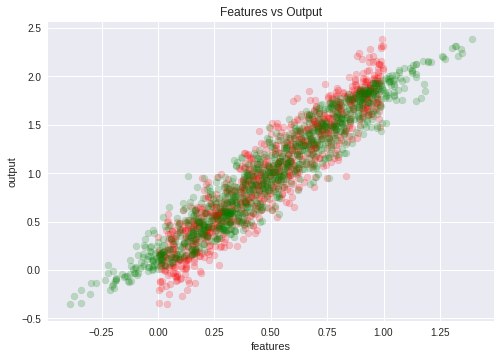

In [29]:
# How would you plot function values?
# Suppose you have (x, y) as the independent variables, and 
# z as the output variable. You know these values are continuous.
# How would you do this?
# One way would be to scatter-plot x and y with z.
# Let's make some values and plot them.
x = np.random.rand(1000)
y = x + 0.2 * np.random.randn(len(x))
z = list(map(lambda x1, y1: x1 + y1, x, y))

plt.scatter(x, z, alpha = 0.2, color = 'r')
plt.scatter(y, z, alpha = 0.2, color = 'g')
plt.xlabel('features')
plt.ylabel('output')
plt.title('Features vs Output')
plt.show()

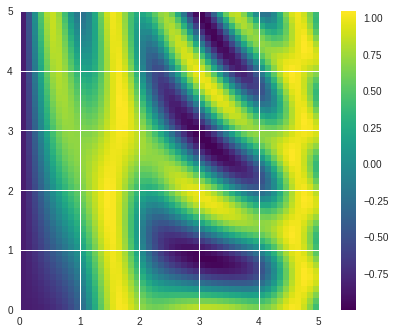

In [30]:
# What if z is a function that represents a surface.
# How would you plot it?

# This code is from the Python Data Science Handbook by Jake VanderPlas.
# Let's make some fake values.
# We create x as a numpy array,
# then replicate it for each row of y.
# z is created as a function of x and y.
# It is necessary to have the same values of x and y,
# so our grid is the same in both dimensions.
# You cannot have missing values of x or y.
x = np.linspace(0, 5, 50)                            # 50 points in a  row
y = np.linspace(0, 5, 50)[:, np.newaxis]             # 50 points in 50 rows, 1 column

# Broadcasting is Python's way of expanding dimensions of arrays
# before applying functions to them (if the arrays are 
# not the correct required dimensions).
# Here we look at how broadcasting changes the shapes
# of x and y to create z.
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x) # x.shape = (50, )  -> (1, 50) -> (50, 50)
                                                     # y.shape = (50, 1) -> (50, 1) -> (50, 50)
						                                         # In last step, both   ^^^^^^^ ones
						                                         # are stretched.
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

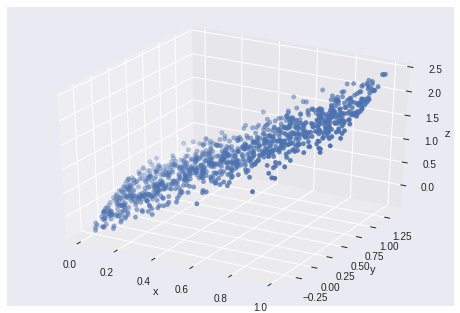

In [31]:
plt.figure()

x = np.random.rand(1000)
y = x + 0.2 * np.random.randn(len(x))
z = list(map(lambda x1, y1: x1 + y1, x, y))

ax = plt.axes(projection = '3d')
ax.scatter3D(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [32]:
# So far we have considered continuous data values.
# How about categorical values?
# How do we select features from a list of categorical features?
# Categorical features may not be ordinal.  Then we cannot
# convert each category's value to a number (because numbers are ordinal).
# For this, let's use the Titanic dataset. It has lots of categorical features.
# This is taken from Lambda's Intro course problem set.
df = sns.load_dataset('titanic').drop(columns=['alive'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


In [34]:
print(df.shape)
df.dtypes

(891, 14)


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alone              bool
dtype: object

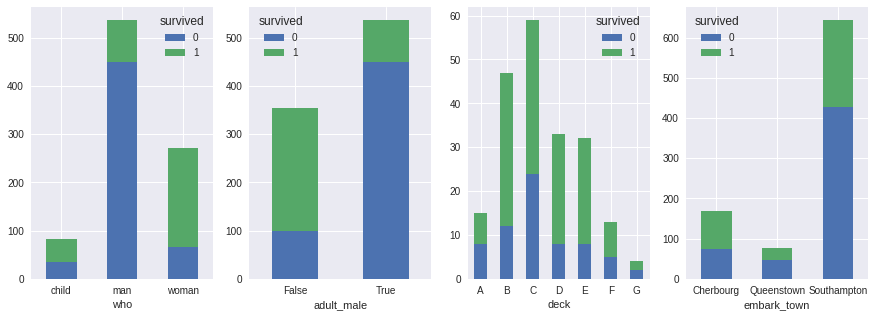

In [46]:
# The features that are categorical are the ones labeled as object.
# Also, some features like pclass are categorical, although labeled as int64.
target = 'survived'

def cross_tab_plot(axis, x, y):
  x_y_table = pd.crosstab(index = x, columns = y)
  x_y_table.plot(ax = axis, kind = 'bar', stacked = True, rot = 0)
  
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
cross_tab_plot(ax[0], df.who, df.survived)
cross_tab_plot(ax[1], df.adult_male, df.survived)
cross_tab_plot(ax[2], df.deck, df.survived)
cross_tab_plot(ax[3], df.embark_town, df.survived)

Now you select those features that have a high/low percentage value for 'survived'  for a particular category.  For example, the 'who' feature has a low survival rate for man (around 15%), and better survival rates for child (around 60%) and woman (around 75%).  That would be a good feature to pick, since it will correctly predict a higher rate of loss of men.  Similar logic can be applied to the 'adult_male' feature.

On the other hand, the deck feature seems to have higher survival rates for decks B, D, and E (around 60%) and lower survival rates for the other decks.  It doesn't seem to be such a good discriminator as the 'who' and 'adult_male' features.  The 'embark_town' feature has a survival rate of 30% if you embarked from Southhampton or Queenstown, and around 55% if you embarked from Cherbourg.  You could use the 'embark_town' feature, but probably not the 'deck' feature.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

A1. Matplotlib is a great tool to visualize data and find patterns in it.  For example, if there is a linear relationship between an input feature, and the output, you can use that feature in a linear regression to find the relationship.  Looking at something visually is an easy way to select the features that you want to use.

2.  What was the most challenging part of what you did?

A2. The most challenging part was in the mechanics:


*   How to generate random data that would still look like a somewhat linear relationship
*   Understanding how to plot 3-d surface as a 2-d colormap



3.  What was the most interesting thing you learned?

A3. How to plot a 3-d surface as a 2-d colormap

4.  What area would you like to explore with more time?

A4. Rotating the 3-D scatter plot



## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about